# 유튜브 영상 특징과 스팸 댓글의 상관관계 분석

## 1. 연령대별

In [ ]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib import rc # type: ignore

# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # Windows의 맑은 고딕 폰트
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호(-) 깨짐 방지

In [22]:
df = pd.read_csv("./collected_comments_by_age.csv")

In [23]:
df.head()

,comment_id,parent_id,author,text,like_count,published_at,is_reply,age
0,UgyXuksFa8BagrOkjyF4AaABAg,NaN,@박규태-e7m,"<a href=""https://www.youtube.com/watch?v=3Ywlj...",0,2024-11-24T07:02:21Z,False,10대
1,UgxeMtQG5z1Ks0gXYGJ4AaABAg,NaN,@호우-w9b4v,이재욱 닮았어요 오빠❤,0,2024-11-24T06:40:25Z,False,10대
2,UgzwyZ96-Sinfx7av4t4AaABAg,NaN,@임승용-p5c,근데 제가 잘몰라서 여쭤보는건데 케틀은 부쉬안에서 때리면 패시브 2개씩 쌓이는데 왜...,0,2024-11-24T05:46:34Z,False,10대
3,UgwoXm8KtlyG-S-Ue914AaABAg,NaN,@땅콩너구리,괴물쥐 영상 보면 도대체 쟤네가 어떻게 마스터인지 이해가 안됨..,0,2024-11-24T05:46:16Z,False,10대
4,UgyH10WRdN0zeic7cBR4AaABAg,NaN,@WaccRopp,롤체 시즌 시작했는데 롤체나하죠?,0,2024-11-24T05:26:10Z,False,10대


In [24]:
df.sort_values(by='like_count', ascending=False, inplace=True)
df.head()

,comment_id,parent_id,author,text,like_count,published_at,is_reply,age
104,UgzTET7xbHV2t0ZzzRt4AaABAg,NaN,@I9금-보관용-계정-B97,<b>박수 한 번 주세요 ~</b>,9509,2024-11-23T15:29:30Z,False,10대
1561,UgxsoPTFDQtB5zgDwe14AaABAg,NaN,@지무비,저작권 허가를 받고 결말까지 다룬 영상입니다. 11월 10일 ≪열혈사제 시즌2≫ 1...,5069,2024-10-28T06:20:56Z,False,20대
2105,Ugy9TlH8BX3nBcuUWot4AaABAg,NaN,@l9금-VIP-ExclusiveGold-채널,아 황우슬혜 보면 볼수록 매력있는 배우인데 요번에 맡은 역할은 코믹스러운 배역이 아...,1926,2024-11-21T14:16:49Z,False,20대
561,UgwZtfTRh8Wf-cjNK4p4AaABAg,NaN,@sleepground,팥붕 먹고 심하게 체해서 이제는<br>팥을 못 먹는 사람의 애증이 담긴 콘텐츠 ㅎㅎ...,1331,2024-11-23T07:37:13Z,False,10대
2091,Ugx9JclwSlc4yxdbX-Z4AaABAg,NaN,@ONfans-l9금-goldLounge-채널,"<b>황우슬혜를 볼 때마다 매력 넘치는 배우라고 생각하는데, 이번에 맡은 역할은 코...",961,2024-11-21T14:33:13Z,False,20대


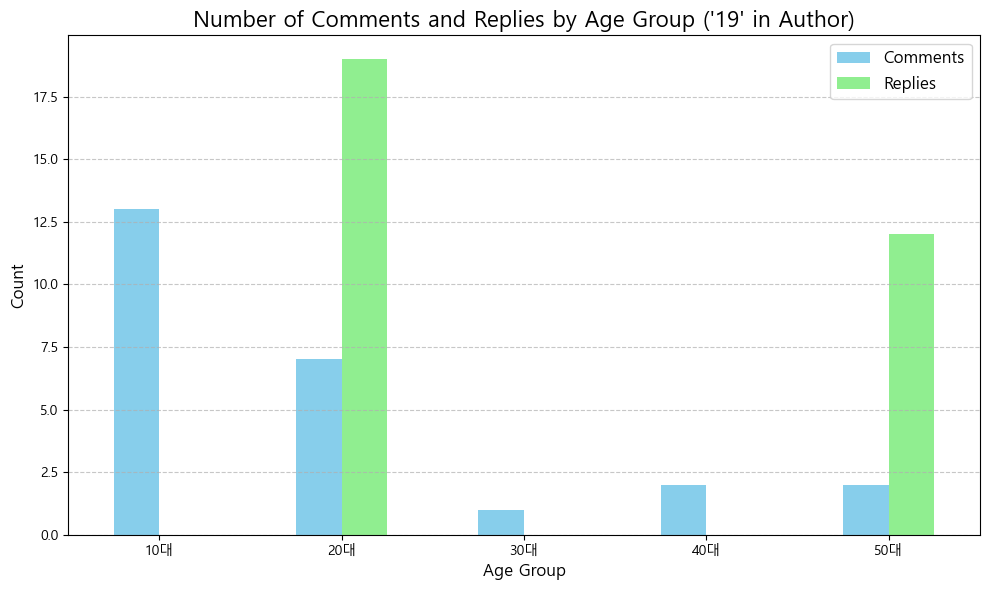

In [ ]:
# 1. 'author'에 'l9'가 포함된 댓글 필터링
author19_comments = df[df['author'].str.contains('l9금', na=False)]

# 2. 해당 댓글에 대한 답글 필터링
replies_to_author19 = df[df['parent_id'].isin(author19_comments['comment_id'])]

# 3. 나이대별 댓글 및 답글 수 계산
# 댓글 수
author19_comment_counts = author19_comments.groupby('age').size()

# 답글 수
author19_reply_counts = replies_to_author19.groupby('age').size()

# 4. 나이대별 댓글 및 답글 수 합산
total_counts = pd.concat([author19_comment_counts, author19_reply_counts], axis=1)
total_counts.columns = ['comment_count', 'reply_count']
total_counts = total_counts.fillna(0)  # NaN 값 0으로 채우기

# 5. 시각화
total_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title("Number of Comments and Replies by Age Group ('19' in Author)", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Comments", "Replies"], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [40]:
len(df[df['like_count'] >= 500])

11

Total comments with likes >= 1000: 43
Comments with '19금' in author: 4
Comments without '19금': 39


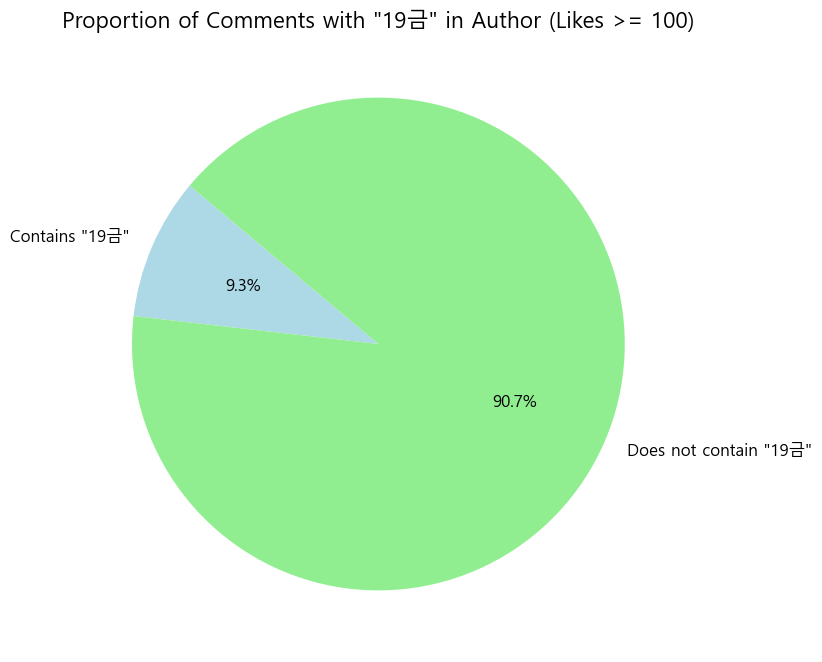

Total comments with likes >= 1000: 21
Comments with '19금' in author: 3
Comments without '19금': 18


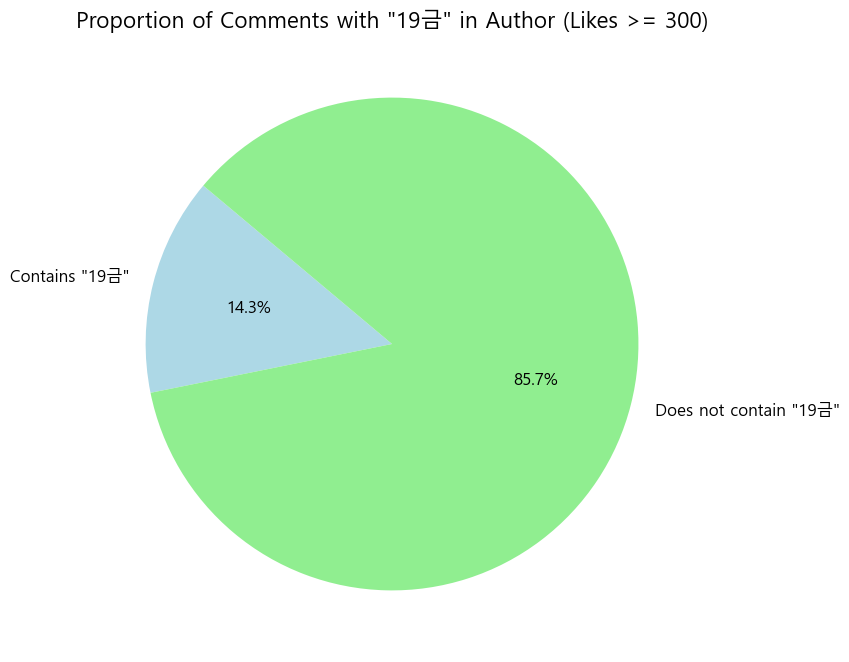

Total comments with likes >= 1000: 11
Comments with '19금' in author: 3
Comments without '19금': 8


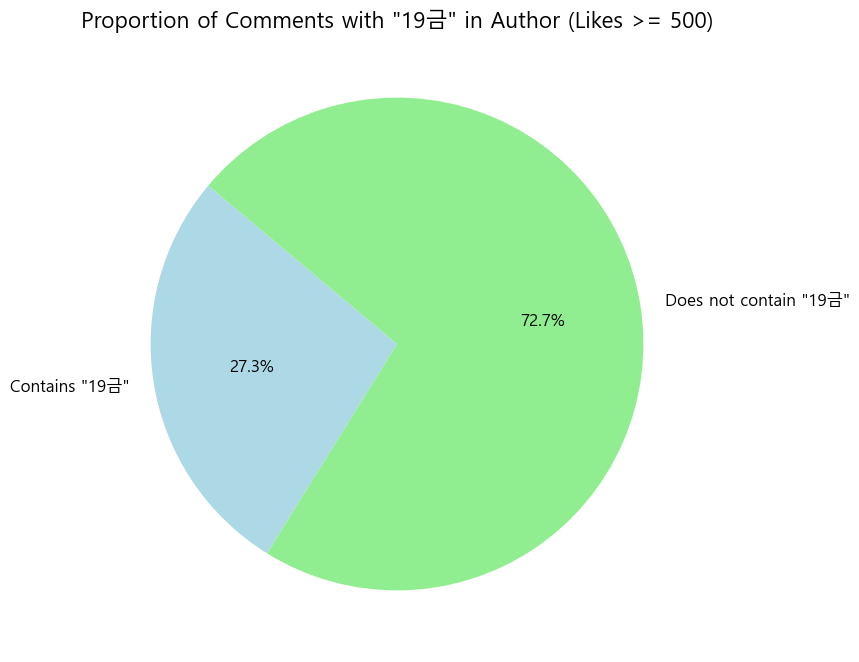

Total comments with likes >= 1000: 5
Comments with '19금' in author: 2
Comments without '19금': 3


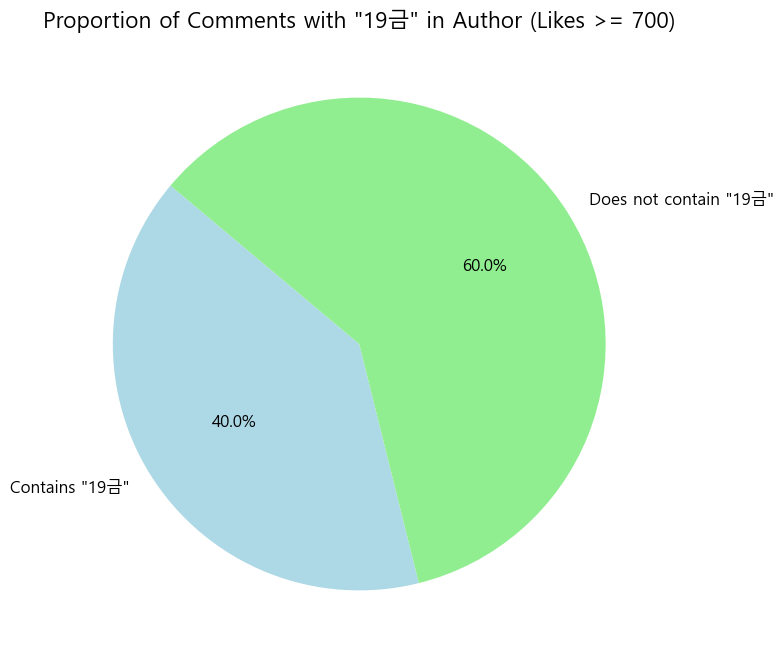

In [42]:
# 1. 좋아요 i개 이상 필터링
for i in [100, 300, 500, 700]:
    filtered_df = df[df['like_count'] >= i]

    # 2. 'author'에 '19금'이 포함된 댓글만 필터링
    author19_filtered = filtered_df[filtered_df['author'].str.contains('l9금', na=False)]

    # 3. 전체 댓글 수와 '19금' 포함 댓글 수 계산
    total_comments = len(filtered_df)
    author19_count = len(author19_filtered)
    non_author19_count = total_comments - author19_count

    # 4. 데이터 확인
    print(f"Total comments with likes >= 1000: {total_comments}")
    print(f"Comments with '19금' in author: {author19_count}")
    print(f"Comments without '19금': {non_author19_count}")

    # 5. 비율 계산 및 원그래프 시각화
    labels = ['Contains "19금"', 'Does not contain "19금"']
    sizes = [author19_count, non_author19_count]
    colors = ['lightblue', 'lightgreen']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
    plt.title(f'Proportion of Comments with "19금" in Author (Likes >= {i})', fontsize=16)
    plt.show()

## 2. 유료광고 포함여부